> **TUGAS BESAR MACHINE LEARNING - Clustering**

> **Nama :** Fadhlan Mochamad Daffa Richtman ( 1301194172 )

> **Kelas :** IF - 43 - 11







# Import Libraries yang digunakan

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
from google.colab import files
from sklearn.cluster import KMeans

# Download data set lewat drive

In [36]:
!gdown --id 19VwUyCvehDbG0Q_BGl_RO6ylesVIs329

Downloading...
From: https://drive.google.com/uc?id=19VwUyCvehDbG0Q_BGl_RO6ylesVIs329
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 48.6MB/s]


## Eksplorasi data

In [37]:
# Read data set yang digunakan
data = pd.read_csv('kendaraan_train.csv')
data.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [38]:
# Cek Info data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [39]:
# Cek duplicate data set
data_duplicate = data[data.duplicated()]
print('Banyak nya data duplicate pada dataset : ', data_duplicate.shape)

Banyak nya data duplicate pada dataset :  (0, 12)


In [40]:
# Cek Missing Value Data
data_missing = data.isnull().sum() * 100 / len(data)
print('Banyak nya data yang mempunyai missing value : ')
data_missing

Banyak nya data yang mempunyai missing value : 


id                   0.000000
Jenis_Kelamin        5.051936
Umur                 4.972869
SIM                  5.039341
Kode_Daerah          5.005055
Sudah_Asuransi       4.978116
Umur_Kendaraan       4.994210
Kendaraan_Rusak      4.963772
Premi                5.097068
Kanal_Penjualan      5.002606
Lama_Berlangganan    4.895200
Tertarik             0.000000
dtype: float64

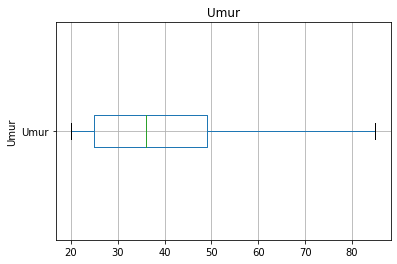

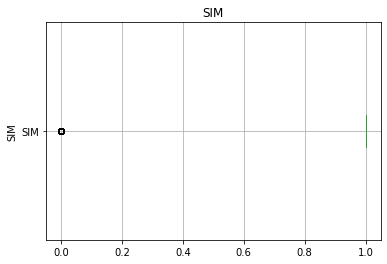

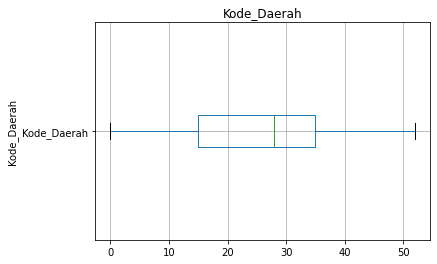

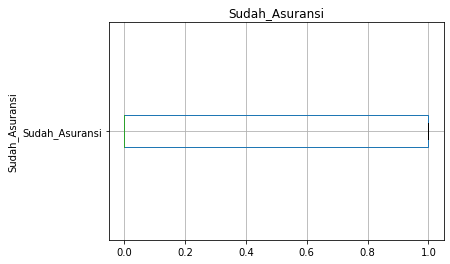

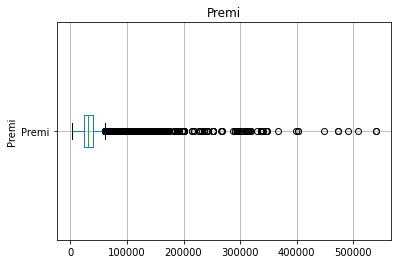

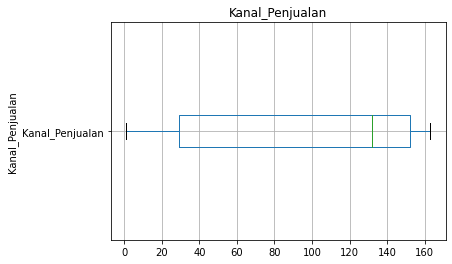

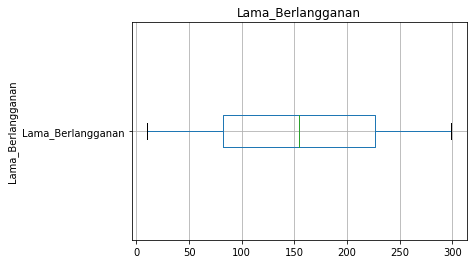

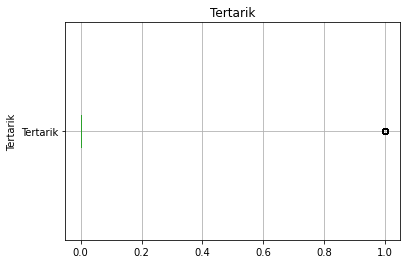

In [41]:
# Cek Outlier
for i in data:
  if data[i].dtypes == 'object' or i == 'id':
    pass
  else:
    data.boxplot(column=i, vert=False)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [42]:
# Cek Data Variation
data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Text(0.5, 1, 'Korelasi antar data ')

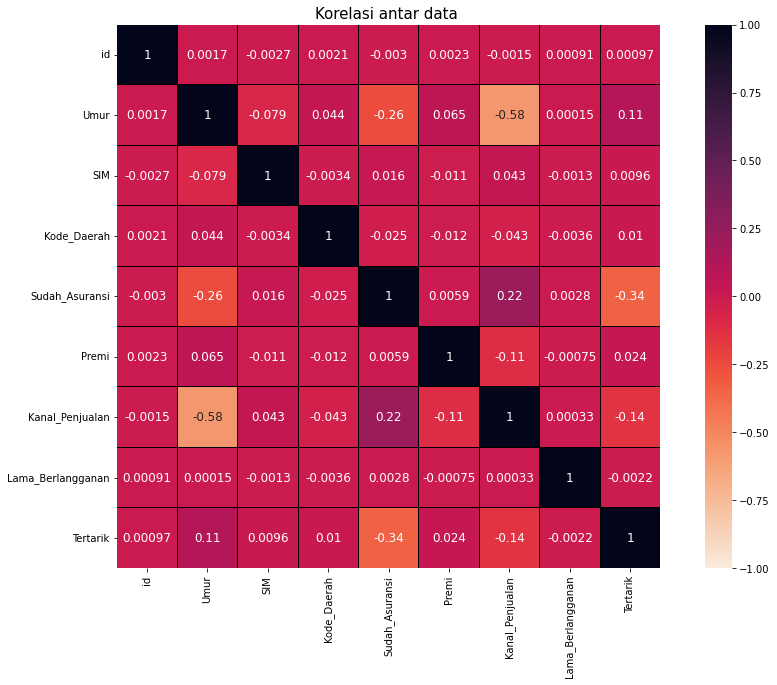

In [43]:
# Cek Correlasi
data_corr = data.corr()
x , y = plt.subplots(figsize = (16,10))
sns.heatmap(data_corr, vmin=-1, vmax=1, 
            linewidths=0.01,square=True,
            annot=True,cmap='rocket_r', 
            annot_kws = {'size':12}, linecolor="black")
plt.title('Korelasi antar data ',y=1,size=15)

## Persiapan Data

In [44]:
# Drop data atau feature yang tidak terpakai pada data frame
data = data.drop(['id', 'Jenis_Kelamin', 'Tertarik'], axis=1)
data.head(5)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [45]:
# Encoder data frame agar semua Data bisa diolah
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace(['< 1 Tahun'], 0)
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace(['1-2 Tahun'], 1)
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace(['> 2 Tahun'], 2)

data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace(['Tidak'], 0)
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace(['Pernah'], 1)

data.head(5)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0


In [46]:
print(data.isna().sum())

Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64


In [47]:
# Info Data frame setelah encoder
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               271617 non-null  float64
 1   SIM                271427 non-null  float64
 2   Kode_Daerah        271525 non-null  float64
 3   Sudah_Asuransi     271602 non-null  float64
 4   Umur_Kendaraan     271556 non-null  float64
 5   Kendaraan_Rusak    271643 non-null  float64
 6   Premi              271262 non-null  float64
 7   Kanal_Penjualan    271532 non-null  float64
 8   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(9)
memory usage: 19.6 MB


In [48]:
# Menangani missing value pada data frame
for i in data:
  if data[i].dtypes == 'object':
    data[i].fillna(data[i].median(), inplace=True)
  else:
    data[i].fillna(data[i].mean(), inplace=True)
  
data_missing = data.isnull().sum()
print('Banyak nya data yang mempunyai missing value : ')
data_missing

Banyak nya data yang mempunyai missing value : 


Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [49]:
# Data frame setelah melakukan filling untuk menangani missing value
data

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,1.0,33.0,1.0,0.0,0.000000,28029.0,152.0,97.0
1,48.0,1.0,39.0,0.0,2.0,1.000000,25800.0,29.0,158.0
2,21.0,1.0,46.0,1.0,0.0,0.000000,32733.0,160.0,119.0
3,58.0,1.0,48.0,0.0,1.0,0.000000,2630.0,124.0,63.0
4,50.0,1.0,35.0,0.0,2.0,0.504791,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,4.0,1.0,0.0,0.000000,25988.0,152.0,217.0
285827,21.0,1.0,46.0,1.0,0.0,0.000000,44686.0,152.0,50.0
285828,23.0,1.0,50.0,1.0,0.0,0.000000,49751.0,152.0,226.0
285829,68.0,1.0,7.0,1.0,1.0,0.000000,30503.0,124.0,270.0


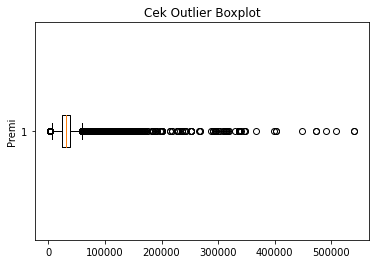

Max value dari Premi :  540165.0
Min value dari Premi :  2630.0


In [50]:
# Menangani data outlier
plt.boxplot(data['Premi'], vert=False)
plt.ylabel('Premi')
plt.title('Cek Outlier Boxplot')
plt.show()
print('Max value dari Premi : ', data['Premi'].max())
print('Min value dari Premi : ', data['Premi'].min())

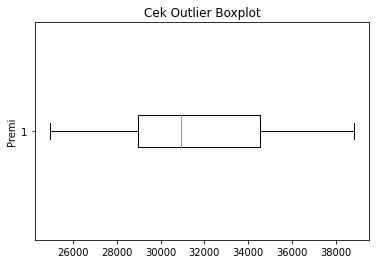

In [51]:
# Menangani data outlier Column "Premi"
max_threshold = data['Premi'].quantile(0.75)
min_threshold = data['Premi'].quantile(0.25)
data = data[(data['Premi']<max_threshold) & (data['Premi']>min_threshold)]
plt.boxplot(data['Premi'], vert=False)
plt.ylabel('Premi')
plt.title('Cek Outlier Boxplot')
plt.show()

In [52]:
# Dataframe setelah menangani outlier
data.head(5)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,1.0,33.0,1.0,0.000000,0.000000,28029.0,152.0,97.0
1,48.0,1.0,39.0,0.0,2.000000,1.000000,25800.0,29.0,158.0
2,21.0,1.0,46.0,1.0,0.000000,0.000000,32733.0,160.0,119.0
4,50.0,1.0,35.0,0.0,2.000000,0.504791,34857.0,88.0,194.0
6,33.0,1.0,8.0,0.0,0.609801,1.000000,32435.0,124.0,215.0


In [53]:
# Feature Scaling data frame agar data menjadi skala dari 0 sampai 1
def minMaxScaler(dataframe):
  return (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())

data = minMaxScaler(data)
data

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,1.0,0.634615,1.0,0.0000,0.000000,0.222725,0.932099,0.301038
1,0.430769,1.0,0.750000,0.0,1.0000,1.000000,0.062527,0.172840,0.512111
2,0.015385,1.0,0.884615,1.0,0.0000,0.000000,0.560802,0.981481,0.377163
4,0.461538,1.0,0.673077,0.0,1.0000,0.504791,0.713454,0.537037,0.636678
6,0.200000,1.0,0.153846,0.0,0.3049,1.000000,0.539385,0.759259,0.709343
...,...,...,...,...,...,...,...,...,...
285821,0.061538,1.0,0.269231,0.0,0.5000,1.000000,0.405491,0.759259,0.560554
285824,0.092308,1.0,0.538462,1.0,0.0000,0.000000,0.402953,0.932099,0.467128
285826,0.046154,1.0,0.076923,1.0,0.0000,0.000000,0.076039,0.932099,0.716263
285829,0.738462,1.0,0.134615,1.0,0.5000,0.000000,0.400532,0.759259,0.899654


Text(0.5, 1, 'Korelasi antar data ')

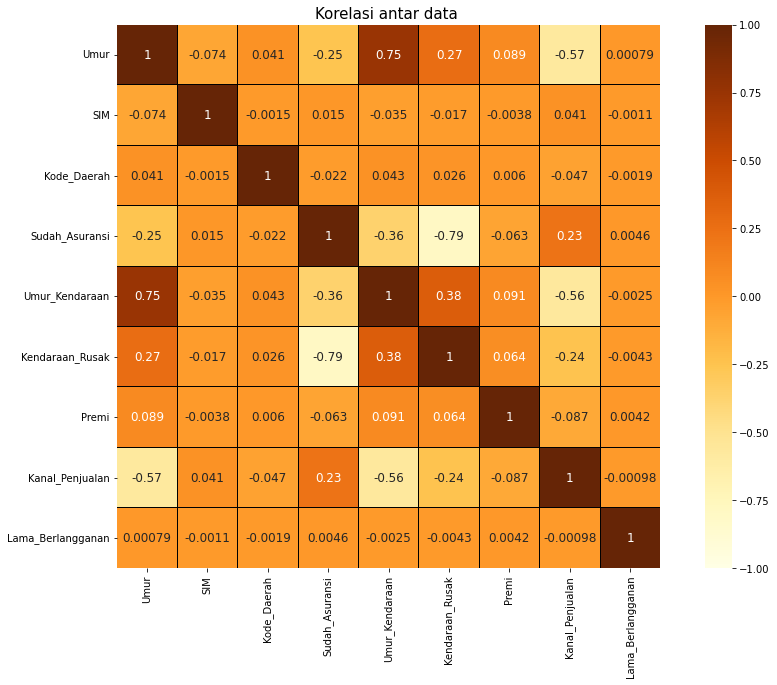

In [54]:
# Heatmap setelah melakukan encoder
data_corr = data.corr()
x , y = plt.subplots(figsize = (16,10))
sns.heatmap(data_corr, vmin=-1, vmax=1, 
            linewidths=0.01,square=True,
            annot=True,cmap='YlOrBr', 
            annot_kws = {'size':12}, linecolor="black")
plt.title('Korelasi antar data ',y=1,size=15)

In [55]:
# Mengexport dataframe yang telah melewati Pre-Processding data
data.to_csv('kendaraan_train_pra-process.csv')

## K-Means Clustering

In [56]:
# Pembuatan method euclidean, untuk menghitung jarak antar kedua centroid
def euclidean(input1, input2):
  return np.sqrt(np.sum((input1-input2)**2))

In [57]:
# Pembuatan K-Means Clustering dari scratch
class k_means:
  # Inisialisasi pembuatan attribute 
  def __init__(self, k=3, iteration=50):
    self.k=k
    self.iteration=iteration
    self.centroids = []
    self.clusters = [[] for i in range(self.k)]
  
  # Pembuatan array dari data yang dimasukan
  def value(self, input):
    self.data = input
    self.row, self.column = input.shape

    # Pembuatan centroid dengan cara random
    centroid_index = np.random.choice(self.row, self.k, replace=False)
    for i in centroid_index:
      self.centroids.append(self.data[i])

    # Melakukan looping sebanyak iterasi yang diinputkan
    # Menentukan cluster atau centroid terdekat
    for i in range(self.iteration):
      clusters = [[] for i in range(self.k)]

      # Melakukan looping sebanyak data inputan
      # Mencari centroid terdekat
      for idx, row in enumerate(self.data):
        centroid_terdekat = self.select_centroidTerdekat(row)
        clusters[centroid_terdekat].append(idx)

      self.clusters = clusters

      # Update terhadap attribute centroid setelah mendapatkan centroid
      # terdekat
      centroid_lama = self.centroids
      self.centroids = self.setNewCentroid()

      # Melakukan Checking apakah centroid berubah
      # Menghitung jarak antara centroid baru dengan centroid yang lama
      change = False
      for i, centroid_lama in enumerate(centroid_lama):
        jarak = euclidean(centroid_lama, self.centroids[i])
        if ( jarak != 0):
          change = True
      if ( change == False):
        break

    # Pembuatan label cluster  
    labels = self.setLables()
    return labels

  # Memilih Centroid terdekat
  def select_centroidTerdekat(self, row):
    jarakSemua = [euclidean(row, centroid) for centroid in self.centroids]
    return np.argmin(jarakSemua)

  # Menggenerate atau membuat centroid baru
  def setNewCentroid(self):
    centroids = np.zeros((self.k, self.column))
    for cluster_idx, cluster in enumerate(self.clusters):
      new_centroid = np.mean(self.data[cluster], axis=0)
      centroids[cluster_idx] = new_centroid
    return centroids

  # Menggenerate labels
  def setLables(self):
    labels = np.empty(self.row)
    for cluster_idx, cluster in enumerate(self.clusters):
      for row in cluster:
        labels[row] = cluster_idx
    return labels

## Eksperimen Clusterisasi

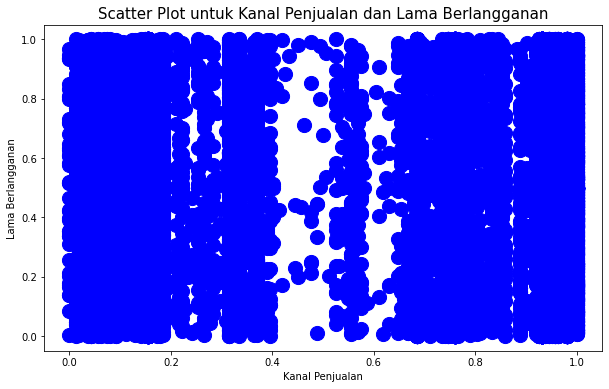

In [58]:
# Pembuatan dataset untuk perhitungan clustering
df_eksperimen1 = data[['Kanal_Penjualan', 'Lama_Berlangganan']]

# Visualisasi scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_eksperimen1['Kanal_Penjualan'], df_eksperimen1['Lama_Berlangganan'], c='blue', s=200)
plt.xlabel('Kanal Penjualan')
plt.ylabel('Lama Berlangganan')
plt.title('Scatter Plot untuk Kanal Penjualan dan Lama Berlangganan',y=1,size=15)
plt.show()

In [59]:
# Implementasi K-Means Clustering pada data Kanal penjualan & Lama berlangganan
var_kMeans = k_means(k=4, iteration=10)
cluster_model1 = var_kMeans.value(df_eksperimen1.values)
centroid = var_kMeans.centroids

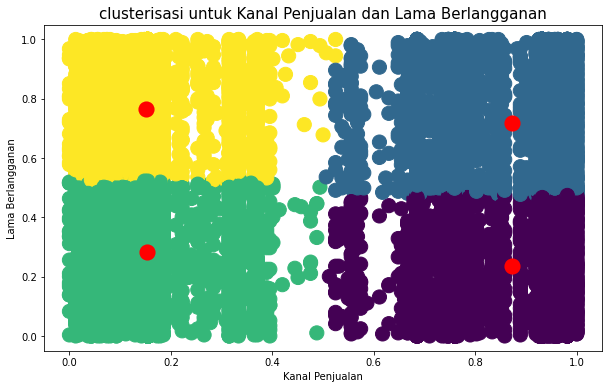

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(df_eksperimen1['Kanal_Penjualan'], df_eksperimen1['Lama_Berlangganan'], c=cluster_model1, s=200)
plt.scatter(centroid[:,0], centroid[:, 1], c='red', marker='o', linewidths=2, s=200)
plt.xlabel('Kanal Penjualan')
plt.ylabel('Lama Berlangganan')
plt.title('clusterisasi untuk Kanal Penjualan dan Lama Berlangganan',y=1,size=15)
plt.show()

In [61]:
# Evaluasi menggunakan sum of squared errors
k_range = range(1,10)
sse = []
for i in k_range:
  km = KMeans(n_clusters=i)
  km.fit(df_eksperimen1)
  sse.append(km.inertia_)
sse

[25698.2064721655,
 12522.979953317825,
 6233.464279005436,
 4329.631926533902,
 2817.2209723163596,
 2438.036670535504,
 1988.9516514503741,
 1696.7918348340772,
 1404.3410030149223]

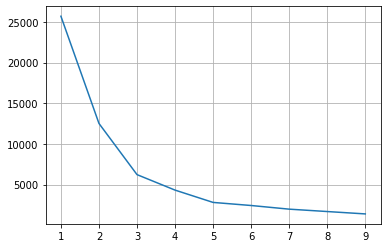

In [62]:
# Elbow Evaluator
plt.figure()
plt.grid()
plt.plot(k_range, sse)

In [63]:
# Eksperimen
# Implementasi K-Means Clustering pada data Kanal penjualan & Lama berlangganan
df_eksperimen2 = data[['Umur', 'Lama_Berlangganan']][:5000]
df_eksperimen2.head()

,Umur,Lama_Berlangganan
0,0.153846,0.301038
1,0.430769,0.512111
2,0.015385,0.377163
4,0.461538,0.636678
6,0.200000,0.709343


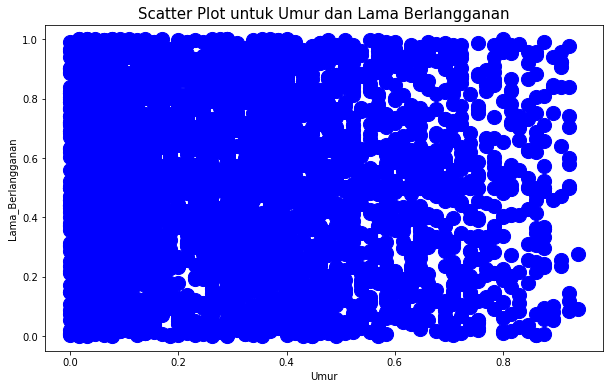

In [64]:
# Scatter Plot Umur dan Kanal Lama Berlangganan
plt.figure(figsize=(10,6))
plt.scatter(df_eksperimen2['Umur'], df_eksperimen2['Lama_Berlangganan'], c='blue', s=200)
plt.xlabel('Umur')
plt.ylabel('Lama_Berlangganan')
plt.title('Scatter Plot untuk Umur dan Lama Berlangganan',y=1,size=15)
plt.show()

In [65]:
# K-Mean clustering eksperimen ke 2
var_kMeans = k_means(k=3, iteration=10)
cluster_model1 = var_kMeans.value(df_eksperimen2.values)
centroid = var_kMeans.centroids

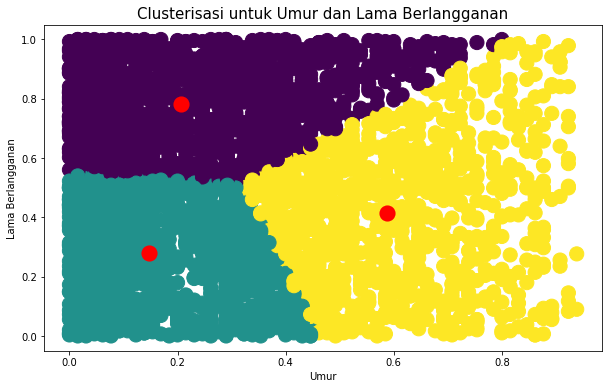

In [66]:
# Visualisasi data umur dan lama berlangganan menggunakan k mean clustering
plt.figure(figsize=(10,6))
plt.scatter(df_eksperimen2['Umur'], df_eksperimen2['Lama_Berlangganan'], c=cluster_model1, s=200)
plt.scatter(centroid[:,0], centroid[:, 1], c='red', marker='o', linewidths=2, s=200)
plt.xlabel('Umur')
plt.ylabel('Lama Berlangganan')
plt.title('Clusterisasi untuk Umur dan Lama Berlangganan',y=1,size=15)
plt.show()

In [67]:
# Evaluasi menggunakan sum of squared errors
k_range = range(1,10)
sse = []
for i in k_range:
  km = KMeans(n_clusters=i)
  km.fit(df_eksperimen2)
  sse.append(km.inertia_)
sse

[658.418306993909,
 372.2573105941534,
 250.45224455573955,
 187.00941720946966,
 142.689266830148,
 117.88573541792192,
 97.13141401628285,
 80.92301088577673,
 71.58543608431444]

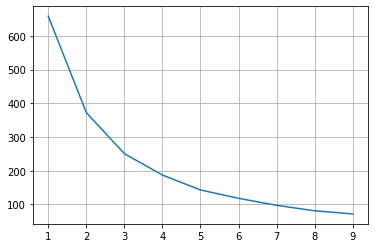

In [68]:
# Elbow Evaluator
plt.figure()
plt.grid()
plt.plot(k_range, sse)

**Kesimpulan**

> Berdasarkan data-data yang telah di process dan diuji coba (Eksperimen), saya menyimpulkan bahwa jika ingin menggunakan K-Means Algorithm Clustering alangkah baiknya jika k=3, karena berdasarkan kurva dari elbow method diatas, data-data akan lebih optimal jika k=3 dan lebih mudah dipahami untuk visualisasinya.


